In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DEvideos.csv to DEvideos.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DE_category_id.json to DE_category_id.json


In [ ]:
DE = pd.read_csv('DEvideos.csv')

In [ ]:
DE.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [ ]:
DE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

In [ ]:
DE.describe()

,category_id,views,likes,dislikes,comment_count
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06


In [ ]:
print("Shape of the dataset:", DE.shape)

Shape of the dataset: (40840, 16)


#Data integrity

In [ ]:
print(DE.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [ ]:
DE['trending_date'] = pd.to_datetime(DE['trending_date'], format='%y.%d.%m')
DE['publish_time'] = pd.to_datetime(DE['publish_time'])


#Handling missing values and duplicates

In [ ]:
print(DE.isnull().sum())

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64


In [ ]:
DE.dropna(subset=['description'], inplace=True)

In [ ]:
print(DE.isnull().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


In [ ]:
duplicates = DE.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
with open('DE_category_id.json', 'r') as f:
    DE_json = json.load(f)

In [ ]:
DE_json = pd.DataFrame(DE_json)

DE_json.head()


,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [ ]:
print(DE_json.columns)

Index(['kind', 'etag', 'items'], dtype='object')


In [ ]:
# Converting JSON to a DataFrame
categories_df = pd.DataFrame(DE_json["items"])

categories_df = pd.DataFrame(list(categories_df['items']))
categories_df = categories_df[["id", "snippet"]].copy()
categories_df["category_name"] = categories_df["snippet"].apply(lambda x: x["title"])
categories_df = categories_df[["id", "category_name"]].copy()
categories_df.rename(columns={"id": "category_id"}, inplace=True)
categories_df["category_id"] = categories_df["category_id"].astype(str)


if 'category_id' not in DE.columns:
    if 'id' in DE.columns:
        DE.rename(columns={'id': 'category_id'}, inplace=True)

    else:
        print(f"Error: Column named 'category_id' or similar is missing in the DE DataFrame")
        print(f"Existing DE columns: {DE.columns.to_list()}")

DE["category_id"] = DE["category_id"].astype(str)

DE = DE.merge(categories_df, on='category_id', how='left')
DE.drop(columns=['category_id'], inplace=True)
print(DE.head())

      video_id trending_date  \
0  LgVi6y5QIjM    2017-11-14   
1  Bayt7uQith4    2017-11-14   
2  1ZAPwfrtAFY    2017-11-14   
3  AHtypnRk7JE    2017-11-14   
4  ZJ9We4bjcg0    2017-11-14   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

               publish_time  \
0 2017-11-13 17:08:49+00:00   
1 2017-11-12 22:30:01+00:00   
2 2017-11-13 07:30:00+00:00   
3 2017-11-12 15:00:01+00:00   
4 2017-11-12 13:10:36+00:00   

                                                tags    views   likes  \
0  inscope21|"sing zu ende"|"gesangseinlagen"|"ge...   25278

In [ ]:
DE_count_df = pd.DataFrame(DE.groupby("category_name").count(), columns=["video_id"])
DE_count_df = DE_count_df.rename(columns={"video_id": "count"})
DE_count_df

,count
category_name,
Autos & Vehicles,855
Comedy,2484
Education,817
Entertainment,14947
Film & Animation,2213
Gaming,1530
Howto & Style,1717
Movies,2
Music,2332


In [ ]:
group_by_category = DE.groupby('category_name')
likes_count = group_by_category['likes'].sum()
likes_count


,likes
category_name,
Autos & Vehicles,6141318
Comedy,73967402
Education,7490558
Entertainment,266770181
Film & Animation,45144385
Gaming,28761415
Howto & Style,15080055
Movies,63834
Music,299278862


In [ ]:
dislikes_count = group_by_category['dislikes'].sum()
dislikes_count

,dislikes
category_name,
Autos & Vehicles,242903
Comedy,7199730
Education,1351607
Entertainment,33613071
Film & Animation,6070311
Gaming,9147256
Howto & Style,5462106
Music,51016380
News & Politics,3944777


In [ ]:
comment_count = group_by_category['comment_count'].sum()
comment_count

,comment_count
category_name,
Autos & Vehicles,784408
Comedy,22353385
Education,5440512
Entertainment,65074068
Film & Animation,17875945
Gaming,14697393
Howto & Style,23093354
Music,124623432
News & Politics,5826378


In [ ]:
views_count = group_by_category['views'].sum()
views_count

,views
category_name,
Autos & Vehicles,520475457
Comedy,5091160909
Education,1179807180
Entertainment,20312758207
Film & Animation,7266276404
Gaming,2112469965
Howto & Style,4070186824
Music,39969138974
News & Politics,1446807411


#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
#numerical columns
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']

#StandardScaler
scaler = StandardScaler()

DE[numerical_cols] = scaler.fit_transform(DE[numerical_cols])

In [ ]:
DE['trending_date'] = pd.to_datetime(DE['trending_date'], errors='coerce')

DE['trending_year'] = DE['trending_date'].dt.year
DE['trending_month'] = DE['trending_date'].dt.month
DE['trending_day'] = DE['trending_date'].dt.day

#Outlier detection

The method chosen to identify outliers is the standard deviation method. After identifying, the IQR method will be employed to addressed the outliers because it handles outliers based on the spread of the data. After addressing the outliers, a box plot will be used to visualize the final result.

threshold = 3

**1. views**

In [ ]:
threshold = 3
mean = DE['views'].mean()
std = DE['views'].std()

DE['outlier_flag'] = (DE['views'] - mean).abs() > threshold * std

outliers = DE[DE['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
31     2Vv-BfVoq4g    2017-11-14   
36     n1WpP7iowLc    2017-11-14   
780    p8XP7A7kvzM    2017-11-18   
786    8-Cjsnq8kVU    2017-11-18   
895    coOKvrsmQiI    2017-11-18   
...            ...           ...   
38866  V15BYnSr0P8    2018-06-12   
38869  ek1ePFp-nBI    2018-06-12   
38886  64UX1npgRkI    2018-06-12   
38966  TIE92mUvSsw    2018-06-13   
39267  TIE92mUvSsw    2018-06-14   

                                                   title  \
31           Ed Sheeran - Perfect (Official Music Video)   
36            Eminem - Walk On Water (Audio) ft. Beyoncé   
780    Spill Your Guts or Fill Your Guts w/ Kim Karda...   
786                       Deadpool’s “Wet on Wet” Teaser   
895                    RAMPAGE - OFFICIAL TRAILER 1 [HD]   
...                                                  ...   
38866  Live It Up (Official Video) - Nicky Jam feat. ...   
38869                  Halloween - Official Trailer (HD)   
38886  Sanju: Kar

In [ ]:
Q1 = DE['views'].quantile(0.25)
Q3 = DE['views'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = DE[(DE['views'] >= lower_bound) & (DE['views'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

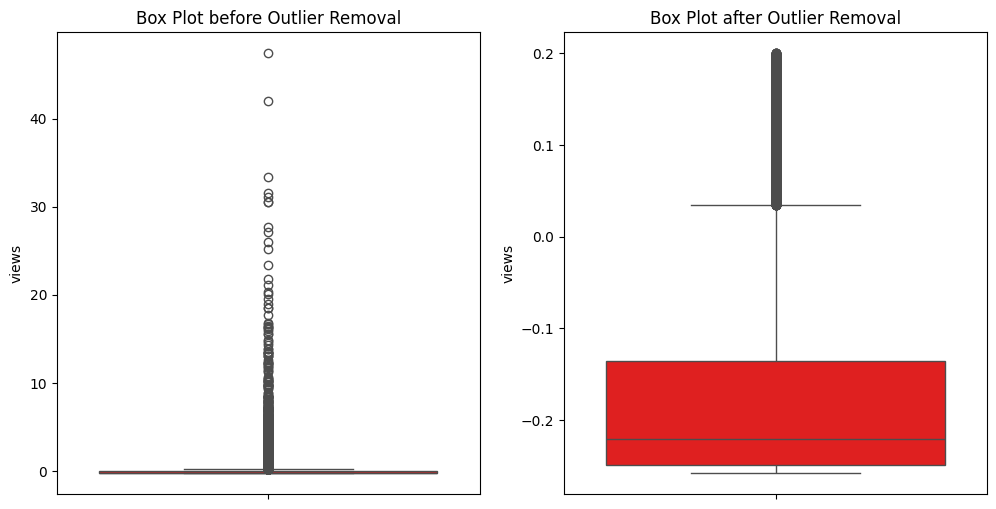

In [ ]:
#distribution of the data before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=DE['views'], color ='red')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['views'], color='red')
plt.title('Box Plot after Outlier Removal')

**2. likes**

In [ ]:
threshold = 3
mean = DE['likes'].mean()
std = DE['likes'].std()

DE['outlier_flag'] = (DE['likes'] - mean).abs() > threshold * std

outliers = DE[DE['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
31     2Vv-BfVoq4g    2017-11-14   
36     n1WpP7iowLc    2017-11-14   
633    ixxR3ZoqnF0    2017-11-17   
941    6uJf2IT2Zh8    2017-11-18   
979    TyHvyGVs42U    2017-11-19   
...            ...           ...   
38993  DGzy8FE1Rhk    2018-06-13   
39150  vUALE5SitT0    2018-06-14   
39236  qQn6TsbYrH8    2018-06-14   
39267  TIE92mUvSsw    2018-06-14   
39278  DGzy8FE1Rhk    2018-06-14   

                                                   title       channel_title  \
31           Ed Sheeran - Perfect (Official Music Video)          Ed Sheeran   
36            Eminem - Walk On Water (Audio) ft. Beyoncé          EminemVEVO   
633    BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...             ibighit   
941                Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV              SMTOWN   
979            Luis Fonsi, Demi Lovato - Échame La Culpa       LuisFonsiVEVO   
...                                                  ...                 ... 

In [ ]:
Q1 = DE['likes'].quantile(0.25)
Q3 = DE['likes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = DE[(DE['likes'] >= lower_bound) & (DE['likes'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

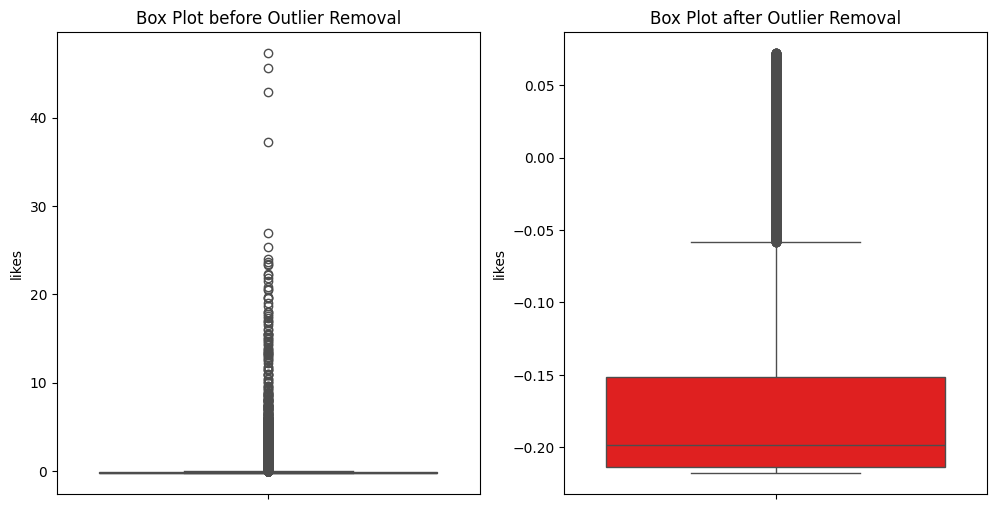

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=DE['likes'], color ='red')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['likes'], color='red')
plt.title('Box Plot after Outlier Removal')

**3. dislikes**

In [ ]:
threshold = 3
mean = DE['dislikes'].mean()
std = DE['dislikes'].std()

DE['outlier_flag'] = (DE['dislikes'] - mean).abs() > threshold * std

outliers = DE[DE['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
886    ilUFnUMlH_g    2017-11-18   
979    TyHvyGVs42U    2017-11-19   
1222   TyHvyGVs42U    2017-11-20   
1630   gAufSaa8S4o    2017-11-22   
1992   pOHQdIDds6s    2017-11-24   
...            ...           ...   
38013  J2HytHu5VBI    2018-06-08   
38259  gi80-tmEduI    2018-06-09   
38476  -DxUh3uyL1U    2018-06-10   
38966  TIE92mUvSsw    2018-06-13   
39267  TIE92mUvSsw    2018-06-14   

                                                   title       channel_title  \
886                                   Чем я лучше Путина   Алексей Навальный   
979            Luis Fonsi, Demi Lovato - Échame La Culpa       LuisFonsiVEVO   
1222           Luis Fonsi, Demi Lovato - Échame La Culpa       LuisFonsiVEVO   
1630                              Спасение повара Путина   Алексей Навальный   
1992   Jake Paul - It's Everyday Bro (Remix) [feat. G...           Jake Paul   
...                                                  ...                 ... 

In [ ]:
Q1 = DE['dislikes'].quantile(0.25)
Q3 = DE['dislikes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = DE[(DE['dislikes'] >= lower_bound) & (DE['dislikes'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

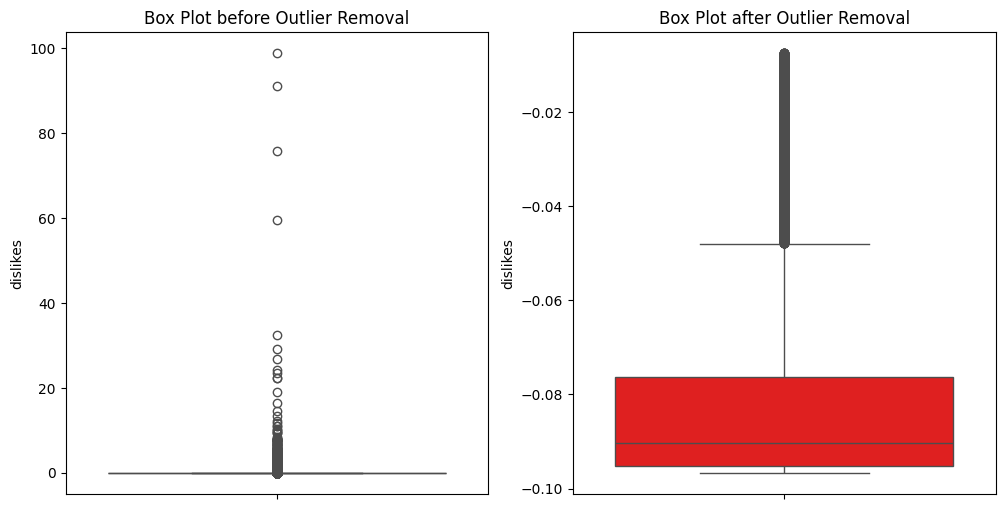

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=DE['dislikes'], color ='red')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['dislikes'], color='red')
plt.title('Box Plot after Outlier Removal')

**4. comment_count**

In [ ]:
threshold = 3
mean = DE['comment_count'].mean()
std = DE['comment_count'].std()

DE['outlier_flag'] = (DE['comment_count'] - mean).abs() > threshold * std

outliers = DE[DE['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
31     2Vv-BfVoq4g    2017-11-14   
36     n1WpP7iowLc    2017-11-14   
633    ixxR3ZoqnF0    2017-11-17   
709    TWpt-ze_cYU    2017-11-17   
979    TyHvyGVs42U    2017-11-19   
...            ...           ...   
38259  gi80-tmEduI    2018-06-09   
38280  VY1eFxgRR-k    2018-06-09   
38476  -DxUh3uyL1U    2018-06-10   
38844  PM47LAAT3j8    2018-06-12   
39150  vUALE5SitT0    2018-06-14   

                                                   title    channel_title  \
31           Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
36            Eminem - Walk On Water (Audio) ft. Beyoncé       EminemVEVO   
633    BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...          ibighit   
709                      You, but in emojis. (YIAY #375)       jacksfilms   
979            Luis Fonsi, Demi Lovato - Échame La Culpa    LuisFonsiVEVO   
...                                                  ...              ...   
38259      Aleyna 

In [ ]:
Q1 = DE['comment_count'].quantile(0.25)
Q3 = DE['comment_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = DE[(DE['comment_count'] >= lower_bound) & (DE['comment_count'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

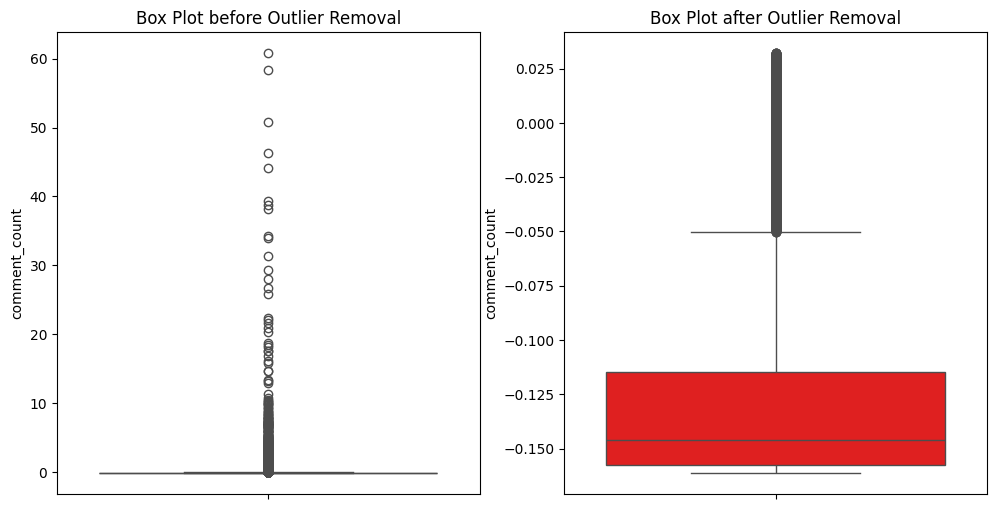

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=DE['comment_count'], color ='red')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['comment_count'], color='red')
plt.title('Box Plot after Outlier Removal')

In [ ]:
# Saving cleaned Data to a new CSV file
DE.to_csv('cleaned_DEvideos.csv', index=False)

In [ ]:
import pandas as pd
df_cleaned = pd.read_csv('cleaned_DEvideos.csv')

In [ ]:
from google.colab import files
files.download('cleaned_DEvideos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>